<a href="https://colab.research.google.com/github/lucifer24786/Tasks/blob/main/Sol1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


***THE SPARKS FOUNDATION : DATA SCIENCE AND BUISNESS ANALYTICS***


---





---


**NAME** : Amaan Kadri

**AIM** - Predict the percentage of a student based on the number of study hours.

**IDE** : Google Colab.

**TYPE**  : Linear Regression.

**LANGUAGE USED** : Python 3





****

In [ ]:
# In this step we import all the libraries required for the task.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [ ]:
# In this step we import values from the dataset provided.
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")
student_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Here weshowhow much values have been imported from the given Dataset.
student_data.shape

(25, 2)

In [ ]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Here we are confirming that there are no null values in the dataset that can affect the training of the algorithm.
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Analysis and Visualization of the Dataset :

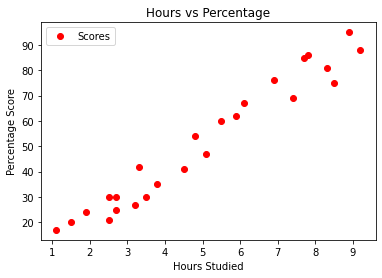

In [ ]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage which means that as no. of study hours increases the percentage scored also increases.**

### **Preparing the data**  : 



In [ ]:
# Here we extract the values of hours data into variable X and values of score Data into variable ytu.
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

In [ ]:
#Number of Hours Studied
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
# Scores Obtained
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

`Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:`

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.15, random_state=13) 

In [ ]:
X_train


array([[8.9],
       [5.5],
       [3.3],
       [1.9],
       [2.5],
       [4.8],
       [3.5],
       [2.7],
       [3.8],
       [1.5],
       [2.7],
       [1.1],
       [7.4],
       [8.5],
       [4.5],
       [3.2],
       [9.2],
       [6.9],
       [7.7],
       [2.5],
       [6.1]])

In [ ]:
X_test

array([[8.3],
       [7.8],
       [5.1],
       [5.9]])

In [ ]:
y_train

array([95, 60, 42, 24, 21, 54, 30, 25, 35, 20, 30, 17, 69, 75, 41, 27, 88,
       76, 85, 30, 67])

In [ ]:
y_test

array([81, 86, 47, 62])

### **Training the Algorithm** : 
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Visualization of the model :

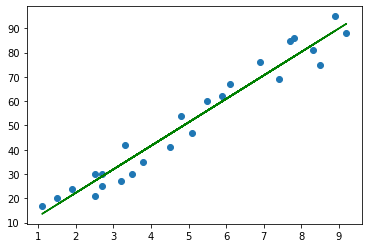

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='green');
plt.show()

### **Making Predictions** :
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [7.8]
 [5.1]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.204756
1,86,78.367043
2,47,52.243395
3,62,59.983735


In [ ]:
print("Score of student who studied for 9.25 hours per day", regressor.predict([[9.25]]))

Score of student who studied for 9.25 hours per day [92.39641038]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

*Mean Absolute Error*

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.274343088463603


*Max  Error*

In [ ]:
print('Max Error :', metrics.max_error(y_test, y_pred))

Max Error : 7.632956573468178


*Mean Squared Error*

In [ ]:
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error : 23.670371854372114
